# Second order systems

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Art with maths is the best kind of art.*

We'll look at what behaviour various poles show now, since we'll be designing controllers (!!) in the next part by placing poles. Poles often come in conjugate pairs, so for some generality we'll look at the second-order ODE
$$ \ddot q + 2\zeta\omega_0\dot q + \omega_0^2 = k\omega_0^2 u.$$
Here, $\omega_0$ is called the natural frequency and $\zeta$ the damping ratio. Then, the characteristic polynomial is
$$s^2 + 2\zeta\omega_0s + \omega_0^2,$$
with roots/poles at $\lambda = -\zeta\omega_0\pm\omega_0\sqrt{\zeta^2-1}$. Time to play around again!

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

import warnings
warnings.filterwarnings("ignore")

import control as cm
from helperFunctions import *
setPlotStyle()


<IPython.core.display.Javascript object>

$\lambda_1 = -\zeta\omega_0+\omega_0\sqrt{\zeta^2-1} = -1.040+0.780j$

$|\lambda_1| = \omega_0 = 1.300$

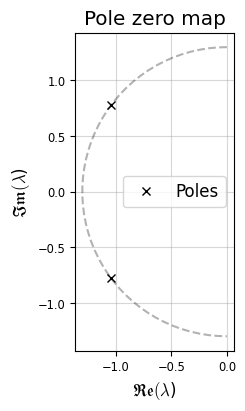

In [2]:
omega0 = 1.3    #CHANGEME
zeta = .8       #CHANGEME

s = cm.tf('s')
P_2d = 1/(s**2 + 2*zeta*omega0*s + omega0**2)

### Plotting ###
fig, ax = plt.subplots(figsize=[4,4])
ax.plot(np.real(P_2d.poles()), np.imag(P_2d.poles()), 'kx', label="Poles")
circ = omega0*np.exp(np.linspace(0.5,1.5)*np.pi*1j)
ax.plot(circ.real, circ.imag, 'k--', alpha=.3)
ax.set(title="Pole zero map", xlabel=r"$\mathfrak{Re}(\lambda$)", ylabel=r"$\mathfrak{Im}(\lambda$)", aspect='equal')
ax.legend()

display(Markdown(rf'$\lambda_1 = -\zeta\omega_0+\omega_0\sqrt{"{"}\zeta^2-1{"}"} = {-zeta*omega0 + omega0*np.emath.sqrt(zeta**2-1):.3f}$'))
display(Markdown(rf'$|\lambda_1| = \omega_0 = {np.abs(P_2d.poles()[0]):.3f}$'))
display(fig)


Now lets look at the step responses! We have three (or four) terms for intervals of $\zeta$:
1. $\zeta>1$ is overdamped
2. $\zeta=1$ is critically damped
3. $\zeta\in [0,1]$ is underdamped
4. and $\zeta<0$ is unstable.

Also the speed of the response is defined by $\omega_0$. We'll plot a few of these.

<IPython.core.display.Javascript object>

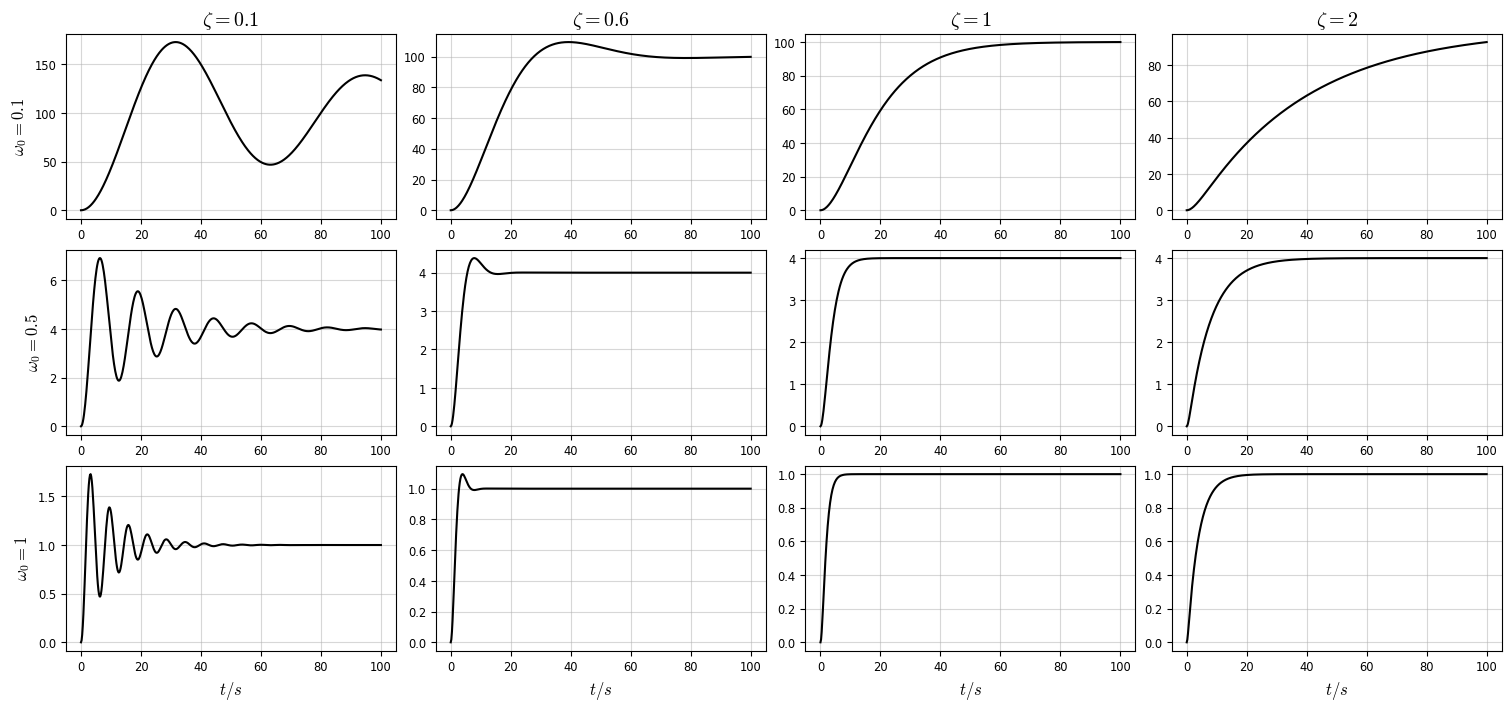

In [3]:
# You can put in whatever and any number of values you want
Omega0 = [.1, .5, 1]
Zeta = [0.1, 0.6, 1, 2]

### Plotting ###
fig, ax = plt.subplots(len(Omega0), len(Zeta), figsize=[15,7])
T = np.linspace(0, 100, 500)

for omega0, axIdx1 in zip(Omega0, range(len(Omega0))):
    for zeta, axIdx2 in zip(Zeta, range(len(Zeta))):
        Pq = cm.ss(1/(s**2 + 2*zeta*omega0*s + omega0**2), dt=0)
        response = cm.forced_response(Pq, T=T, U=np.ones_like(T))
        ax[axIdx1, axIdx2].plot(response.time, response.outputs, 'k')

[ax[0,p].set(title=f"$\zeta={Zeta[p]}$") for p in range(len(Zeta))]
[ax[p,0].set(ylabel=f"$\omega_0={Omega0[p]}$") for p in range(len(Omega0))]
[ax[2,p].set(xlabel=f"$t/s$") for p in range(len(Zeta))]
display(fig)


## Why are second order systems so important?

It turns out that system behaviour is largely dictated by the dominant eigenvalue pair (equivalently, the slowest pair, the pair with the largest real value). If there are pole pairs with the same real value, the pair with the lowest damping ratio $\zeta = -\frac{\mathfrak{R}(\lambda)}{|\lambda|}$ is the dominant pair.


<IPython.core.display.Javascript object>

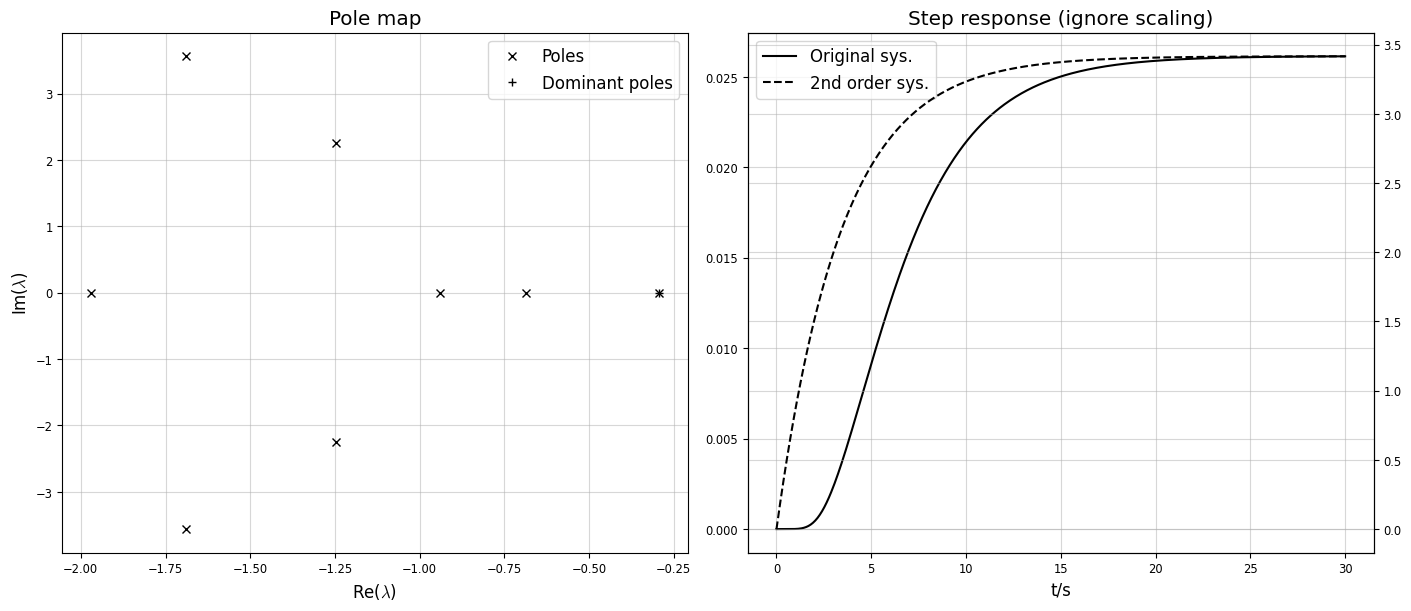

In [12]:
# Create random system
P_dom = cm.rss(8)
P_dom = cm.ss(cm.zpk(poles=P_dom.poles(), zeros=[], gain=1, dt=0))

# Find dominant poles
poles = P_dom.poles()
DomRe = poles.real.max()
DomPoles = poles[np.abs(poles.real / DomRe -1) < 1e-4]

if len(DomPoles) > 2:
    dampRatio = -np.real(DomPoles)/np.abs(DomPoles)
    DomPoles2d = DomPoles[dampRatio == min(dampRatio)]
else:
    DomPoles2d = DomPoles

P_dom_2d = cm.ss(cm.zpk(poles=DomPoles2d, zeros=[], gain=1, dt=0))

T_dom = np.linspace(0, 30, 500)
response_dom =    cm.forced_response(P_dom,    T=T_dom, U=np.ones_like(T_dom))
response_dom_2d = cm.forced_response(P_dom_2d, T=T_dom, U=np.ones_like(T_dom))

fig, ax = plt.subplots(1, 2)
ax[0].plot(P_dom.poles().real, P_dom.poles().imag, 'kx', label="Poles")
ax[0].plot(P_dom_2d.poles().real, P_dom_2d.poles().imag, 'k+', label="Dominant poles")
ax[0].set(title="Pole map", xlabel="Re($\lambda$)", ylabel="Im($\lambda$)")
ax[0].legend()


l0 = ax[1].plot(response_dom.time, response_dom.outputs, 'k', label="Original sys.")
l1 = ax[1].twinx().plot(response_dom_2d.time, response_dom_2d.outputs, 'k--', label="2nd order sys.")
ax[1].legend(handles = [l0[0], l1[0]])
ax[1].set(title="Step response (ignore scaling)", xlabel="t/s")
display(fig)
